In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gower
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import seaborn as sns
from sklearn.metrics import rand_score, adjusted_rand_score
import sys
import os

## import tSNE
## import custom scripts
sys.path.append(os.path.abspath(os.path.join('scripts')))
import preprocessing
import autoencoder_detection
import isolation_forest_detection
import lof_detection
import knn_detection
import dbscan_detection
import pca_detection
import utils

importlib.reload(utils)
importlib.reload(lof_detection)
importlib.reload(autoencoder_detection)
importlib.reload(preprocessing)
importlib.reload(isolation_forest_detection)
importlib.reload(knn_detection)
importlib.reload(dbscan_detection)
importlib.reload(pca_detection)

<module 'pca_detection' from '/home/ronin/Dev/notebooks/machinelearningformodeling/unsupervised/project/scripts/pca_detection.py'>

In [77]:
df = pd.read_csv('data/data2.csv', sep=';').iloc[:, :-2]
outliers = df.iloc[:,-1]
df = df.iloc[:, :-1]
df.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,61.0,6.0,23.0,87.0,26.0
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29.0,15.0,61.0,96.0,64.0
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,29.0,19.0,58.0,103.0,56.0
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,114.0,3.0,24.0,61.0,39.0
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,49.0,3.0,5.0,116.0,4.0


In [78]:
df.iloc[:, utils.binary_indices] = df.iloc[:,utils.binary_indices].replace({0:1, 1:0})

In [79]:
df.dtypes

Age                          float64
Sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH                          float64
T3_measured                  float64
TT4_measured                 float64
T4U_measured                 float64
FTI_measured                 float64
dtype: object

In [80]:
# set dtype to integer
df.iloc[:,utils.binary_indices] = df.iloc[:,utils.binary_indices].astype(int)

In [81]:
for column in df.iloc[:,utils.binary_indices].columns:
    print(df[column].value_counts(), '\n')

Sex
1.0    4789
0.0    2127
Name: count, dtype: int64 

on_thyroxine
1.0    5985
0.0     931
Name: count, dtype: int64 

query_on_thyroxine
1.0    6808
0.0     108
Name: count, dtype: int64 

on_antithyroid_medication
1.0    6825
0.0      91
Name: count, dtype: int64 

sick
1.0    6651
0.0     265
Name: count, dtype: int64 

pregnant
1.0    6838
0.0      78
Name: count, dtype: int64 

thyroid_surgery
1.0    6817
0.0      99
Name: count, dtype: int64 

I131_treatment
1.0    6800
0.0     116
Name: count, dtype: int64 

query_hypothyroid
1.0    6482
0.0     434
Name: count, dtype: int64 

query_hyperthyroid
1.0    6436
0.0     480
Name: count, dtype: int64 

lithium
1.0    6826
0.0      90
Name: count, dtype: int64 

goitre
1.0    6857
0.0      59
Name: count, dtype: int64 

tumor
1.0    6740
0.0     176
Name: count, dtype: int64 

hypopituitary
1.0    6915
0.0       1
Name: count, dtype: int64 

psych
1.0    6572
0.0     344
Name: count, dtype: int64 


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.iloc[:,utils.continuous_indices] = scaler.fit_transform(df.iloc[:,utils.continuous_indices])

In [83]:
df

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,0.000854,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.234818e-01,0.063153,0.058222,0.373256,0.040495
1,0.001165,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.870445e-02,0.157890,0.154425,0.411891,0.099685
2,0.000291,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,5.870445e-02,0.199996,0.146830,0.441940,0.087224
3,0.001631,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.307692e-01,0.031574,0.060754,0.261644,0.060744
4,0.001437,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,9.919028e-02,0.031574,0.012652,0.497746,0.006227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.001243,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,9.514170e-07,0.084206,0.389870,0.321743,0.317754
6912,0.001476,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.214575e-07,0.000212,0.316451,0.459111,0.182240
6913,0.000777,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.631579e-06,0.263154,0.316451,0.489161,0.169779
6914,0.001223,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.578947e-06,0.000212,0.268350,0.377549,0.188470


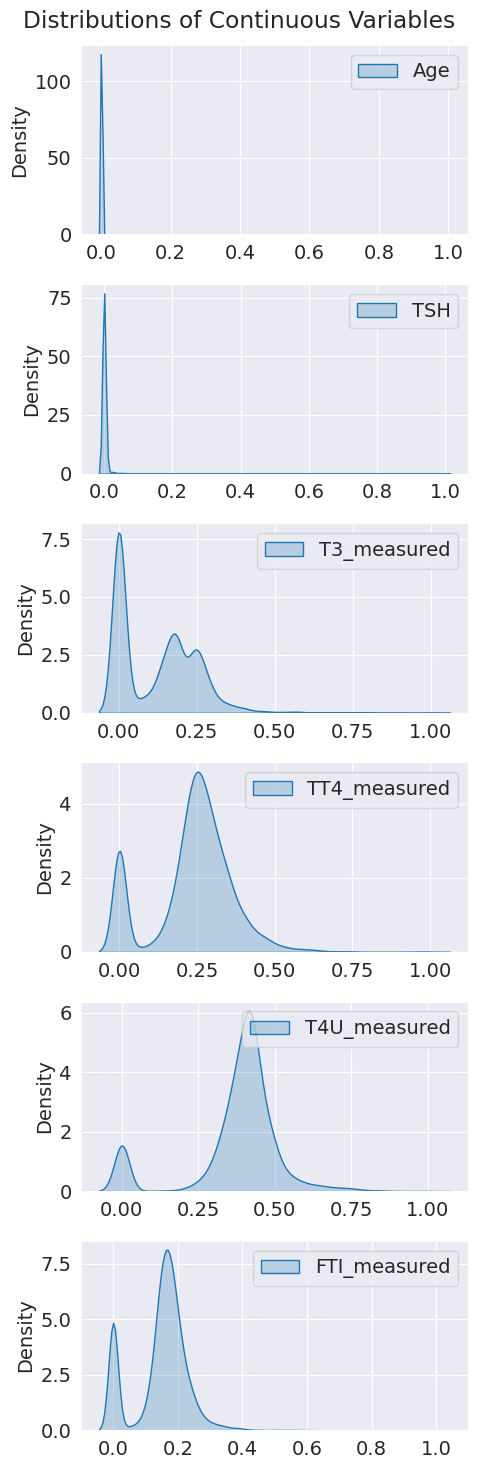

In [84]:
fig, axes = plt.subplots(6, 1, figsize=(5, 15))
plt.rcParams.update({'font.size': 14})

axes = axes.flatten() # used to simplify the iteration over the subplots
for i, column in enumerate(df.iloc[:,utils.continuous_indices].columns):
    sns.kdeplot(df[column], fill=True, common_norm=False, label=f'{column}', ax=axes[i])
    axes[i].set_xlabel('') ## hide x label
    axes[i].set_ylabel('Density')
    axes[i].legend()

fig.suptitle('Distributions of Continuous Variables')
plt.tight_layout()
plt.show()

In [85]:
outliers.replace({'o': -1, 'n': 0}, inplace=True)
outliers.value_counts()

Outlier_label 
 0    6666
-1     250
Name: count, dtype: int64

In [86]:
df['anomalies'] = outliers

In [87]:
# save df to csv
df.to_csv('data/data2_preprocessed.csv', index=False)

In [88]:
df.dtypes

Age                          float64
Sex                          float64
on_thyroxine                 float64
query_on_thyroxine           float64
on_antithyroid_medication    float64
sick                         float64
pregnant                     float64
thyroid_surgery              float64
I131_treatment               float64
query_hypothyroid            float64
query_hyperthyroid           float64
lithium                      float64
goitre                       float64
tumor                        float64
hypopituitary                float64
psych                        float64
TSH                          float64
T3_measured                  float64
TT4_measured                 float64
T4U_measured                 float64
FTI_measured                 float64
anomalies                      int64
dtype: object